In [46]:
from frame_selector import Frame_selector
from get_f import *
import velocity
import numpy as np 
import cv2 as cv2
import matplotlib.pyplot as plt

# deblurring process

<ipython-input-47-67a924ad9883>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  cv2.imwrite('frequency_mask_s300.png', np.uint8(F_img))


True

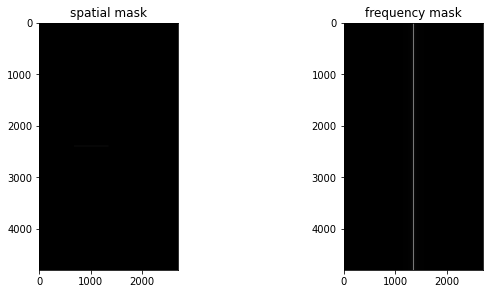

In [47]:
img = cv2.imread('out\\filter_30_255.png')
scale = 300
img = np.zeros((16*scale,9*scale))
h, w = img.shape[:2]
img[h//2,w//4:w//2] = 1

F_img = np.fft.fft2(img)
F_img = np.fft.fftshift(F_img)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('spatial mask')
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.title('frequency mask')
plt.imshow((np.abs(F_img)), cmap='gray')


cv2.imwrite('spatial_mask_s30.png', np.uint8(img))
cv2.imwrite('frequency_mask_s300.png', np.uint8(F_img))

# analyze motion

In [ ]:
IDs = ['7.18_1','7.18_2','7.18_3','7.18_4','7.18_5','7.18_6','7.18_7','7.18_8','7.18_9',\
        '7.19_1','7.19_2','7.19_3','7.19_4','7.19_5','7.19_6',\
        '7.21_1','7.21_2','7.21_3','7.21_4','7.21_5','7.21_6','7.21_7']

for video_id in IDs:

    print(video_id)

    FF = Frame_selector()
    FF.set_path('videos\\'+video_id+'.MOV') 
    FF.load_vedio(proxy_compress=5)
    FF.set_threshold(sift_thres=0.5, interest_thres=10)
    # FF.search_frames()
    FF.add_all_frames_to_selected_frames()
    print(FF.selected_frames)

    f = get_f(26, 3/5, 1080, 3000, 2160)


    '''analyze motion'''
    
    Vel = []
    neigb_frames = FF.out_neighb_frames()
    # neigb_frames = neigb_frames[:10] # testing set

    for i, (imgl, imgr) in enumerate(neigb_frames):
        print('calc v of '+str(i))
        v = velocity.get_velocity(imgl, imgr, f, ratio=0.6, t=2/FF.fps)
        Vel.append(v)


    plt.subplots()
    plt.plot(np.arange(len(Vel)), Vel)
    plt.xlabel('Frame')
    plt.ylabel('Speed (pixel/s)')

    plt.savefig(video_id+'_Vel.png')
    
plt.show()

# analyze frame selection

In [ ]:
IDs = ['7.18_1','7.18_2','7.18_3','7.18_4','7.18_5','7.18_6','7.18_7','7.18_8','7.18_9',\
        '7.19_1','7.19_2','7.19_3','7.19_4','7.19_5','7.19_6',\
        '7.21_1','7.21_2','7.21_3','7.21_4','7.21_5','7.21_6','7.21_7']

for video_id in IDs:

    print(video_id)

    FF = Frame_selector()
    FF.set_path('videos\\'+video_id+'.MOV') 
    FF.load_vedio(proxy_compress=5)
    FF.set_threshold(sift_thres=0.5, interest_thres=10)
    # FF.search_frames()
    FF.add_all_frames_to_selected_frames()
    print(FF.selected_frames)

    f = get_f(26, 3/5, 1080, 3000, 2160)   


    '''analyze frame selection'''
    
    num_good = []
    num_1 = []
    num_2 = []

    i = 1
    frame1 = FF.frames_proxy[i]
    for j in range(2, FF.L-2):
        frame2 = FF.frames_proxy[j]
        _, good_indexes, kps1, kps2 = FF.out_sift_matching(frame1, frame2, 0.5)
        num_good.append(len(good_indexes))
        num_1.append(len(kps1))
        num_2.append(len(kps2))

    fig1, ax1 = plt.subplots()
    ax1.plot(np.arange(len(num_good)), num_good, label='pair of img1 and img2')
    ax1.legend()
    plt.xlabel('distance in index')
    plt.ylabel('number of good match pairs')
    plt.savefig(video_id+'_num_of_good.png')

    fig2, ax2 = plt.subplots()
    ax2.plot(np.arange(len(num_1)), num_1, label='img1')
    ax2.legend()
    ax2.plot(np.arange(len(num_2)), num_2, label='img2')
    ax2.legend()
    plt.xlabel('diatance in index')
    plt.ylabel('number of interest point')
    plt.savefig(video_id+'_num_of_1_2.png')
    

plt.show()